In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.txt',delimiter=" ",names= ['date','time','user_id','domain'])

In [3]:
df['date'] = df['date'].astype('datetime64')

In [4]:
df

,date,time,user_id,domain
0,2019-02-25,12:53:01,a37agOUtUEQiyagcdU2TAA..,youtube.com
1,2019-02-25,11:58:01,5wGdzKx3Kf4WK0gNfwZPpw..,www.google.com
2,2019-02-25,14:29:01,ZoVXA0kss3EZXHWxv96EXA..,trangtraiviet.vn
3,2019-02-25,20:52:01,SE5aS0u9gRYDV76kCwilXQ..,vn.yahoo.com
4,2019-02-25,00:58:01,EGYc8cXe6GVDH3qp-qnPSQ..,www.youtube.com
...,...,...,...,...
69995,2019-03-03,17:56:01,ep7D0dpRFjKYLV8WNv4qhA..,www.google.com
69996,2019-03-03,19:40:01,YczVvu-ZARiSFPMCpY4R2g..,www.googleadservices.com
69997,2019-03-03,12:04:01,tmmVRJwUubpbs649mEVuLA..,www.youtube.com
69998,2019-03-03,00:54:01,3T3iWxyAllzLH1Tu-ezJUg..,www.facebook.com


# DAU

In [7]:
df.groupby('date')['user_id'].nunique()

date
2019-02-25    9857
2019-02-26    9862
2019-02-27    9870
2019-02-28    9871
2019-03-01    9844
2019-03-02    9834
2019-03-03    9820
Name: user_id, dtype: int64

# Facebook DAU

In [8]:
df.domain.value_counts()

www.facebook.com      17403
www.youtube.com       13648
coccoc.com             6177
www.google.com         3657
mail.google.com        2250
                      ...  
soikeoplus.com            1
mixi.vn                   1
jobs.vietravel.com        1
docs.python.org           1
banh247.com               1
Name: domain, Length: 6324, dtype: int64

In [9]:
df[df.domain == 'www.facebook.com'].groupby('date')['user_id'].nunique()

date
2019-02-25    2487
2019-02-26    2412
2019-02-27    2473
2019-02-28    2300
2019-03-01    2513
2019-03-02    2575
2019-03-03    2594
Name: user_id, dtype: int64

# traffic distribution by hours

In [10]:
df['hour'] = df['time'].str[0:2].astype('int64')

Text(0.5, 1.0, 'traffic distribution by hours')

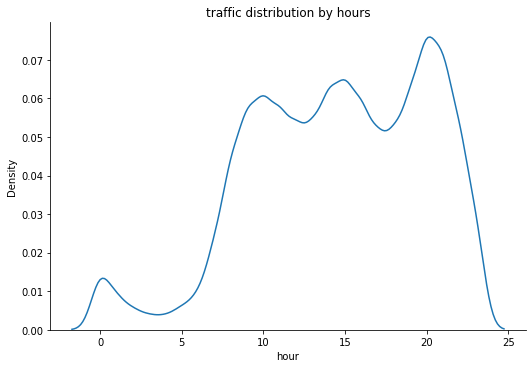

In [11]:
sns.displot(data=df.sort_values('hour'),x='hour',height=5, aspect=1.5, kind='kde')
plt.title('traffic distribution by hours')

# top10 domains by traffics

In [12]:
df.domain.value_counts().reset_index().rename(columns = {'domain':'traffics','index':'domain'}).head(10)

,domain,traffics
0,www.facebook.com,17403
1,www.youtube.com,13648
2,coccoc.com,6177
3,www.google.com,3657
4,mail.google.com,2250
5,www.google.com.vn,1516
6,translate.google.com,1074
7,accounts.google.com,776
8,translate.google.com.vn,773
9,www.24h.com.vn,702
